## Reader of the pickle files
The files ending in .pkl have computed a boatload of structural alignments.  the file name specifies the source of the alignement

so for example,  mammoth.pcl

this contains a hierarchical data structure.
the top level is a list.  the order of the list is arbitrary.  so the index does not tell you what the pdb file names is

The list is a list of "Process" class instances.
-    Process.name is the name of the pdb
-   Process.XXXX_metric is a set of metrics computed using a specific methodology (XXX) for aligning the proteins
-   Process.YYYY_alignment is details on how the proteins were rotated in space to do the alignment YYYY
    

the Process.XXX_metric contains a class that holds the metrics.  These are
-    .aSeq is the fraction sequence identity in the aligned residues
-    .oSeq is the fraction of sequence identity in the subset of the alignned residues structurally superimposable by method XXXX
-    .aRMS  after applying method XXXX to the protein this is the RMS deviation between the proteins using just the atoms of the seqeunce aligned rtesidues
-    .oRMS is like .aRMS except it considers the RMS over the residues strongly aligned by method XXXX
-    .TM   the TM score of the proteins when aligned using method XXXX. )
-    .aSeq_ident  is the fraction of identical sequence measured over the seqeunce alignment provided.
-    .oSeq_ident  is the fraction of identical sequence measured over the subset of the sequence alignment that was also aligned structurally by method XXXX
-    .PSI is the fraction relative to smaller protein of the aligned residues
-    .cPSI is the fraction but with a more stringent cut off on the structure requiing only atoms <4 angstoms RMSD
-    .cRMS is the rmsd of these core atoms 
-    .cSeq is the fractional sequecne identitiy over the core atoms.

Most people will not be interested in the Process.YYYY_alignment info.  it contains internal information to be able to recreate the
orientation of the proteins found my method YYYY.  THis can be handy for displaying the proteins later.

###  the classes here are just named tuples.  this makes their values immutable and also makes for easy conversion of the object to just a tuple.  They can be accessed by either attibute name or by index numberlike an ordered tuple

In [1]:
from collections import namedtuple
Metrics = namedtuple('Metrics',['TM','PSI','aPSI','oPSI','rPSI','cRMS','aRMS','oRMS','aSeq_ident','oSeq_ident','cSeq_Ident','L_min','L_aligned','L_orientable','L_PSI'])                              
MAXSUB_TM= namedtuple('MAXSUB_TM',('score','rotation','alignment','alignedRMS'))
Process = namedtuple('Process',('name','tm_alignment','maxsub_alignment','tm_metric','maxsub_metric','strong_metric','weak_metric'))

#### Reading in a file
It's a pickle so this is easy.  But to reconstruct it you have to define the classes above.



In [2]:
import pickle
tag = 'sam'
with open('tm_'+tag+'.pkl','rb') as infile:
    h = pickle.load(infile)

In [3]:
h  #  you really don't want to look inside h but here is the data structure list

[Process(name='d1a05a_d1dgsa3', tm_alignment=MAXSUB_TM(score=0.5056788624490913, rotation=(array([[-0.76575138, -0.36723258,  0.52798207],
        [-0.57095753,  0.76604581, -0.29526482],
        [-0.29602759, -0.52755478, -0.79627484]]), array([5660.07394775, 1870.15873304, 1314.08233127]), 1.0, array([ 5.06734328, 26.24789552, 48.0128806 ]), array([35.6658209 ,  6.7881194 , 21.83083582])), alignment=array([ 7,  8,  9, 10, 11, 12, 13,  4,  1,  6,  5, 60,  3, 14, 15, 32, 55,
        62, 16, 17, 18, 28, 29, 30, 31, 34, 37, 38, 39, 40, 43, 45, 48, 52,
        53, 54, 56, 61, 63, 64, 65, 66, 67, 19, 20, 27, 35, 36, 41, 42, 44,
        47, 49, 50, 51, 57, 59, 26, 46, 33, 25,  2, 22, 23, 21, 58,  0]), alignedRMS=3.668536273270631), maxsub_alignment=MAXSUB_TM(score=67, rotation=(array([[-0.76781778, -0.35436766,  0.53374096],
        [-0.57116318,  0.75601489, -0.31970943],
        [-0.29022143, -0.55033177, -0.78288343]]), array([5770.01053685, 1822.89125872, 1315.69127253]), 1.0, array([ 5

#### acessing by Process attribute
#####  The metrics
So h is for the mammoth alignments.  mammoth defines a weak alignment and a strong alignment. The latter is a subset of the former where it has higher confidence. 
"weak_metric" uses the weak alignment the basis for structural superposition by maxsub. 
"strong_metric " ignores the weakly aligned residues, so fewer aligned residues too
"tm_metric" While hunting for the optimal MaxSUB superposition it also tries to find the optimal TM scoring superposition.  This can be a different set of superimposable residues than the optimal MaxSub
"maxSub_metric" considers only the subset of the weak alignment that has the best MaxSub superposition


In [4]:
h[0].tm_metric  # get the first protein (0) and pull out the metrics found by alignment using the tm method

Metrics(TM=0.5056788624490913, PSI=0.6625, aPSI=0.775, oPSI=0.3125, rPSI=0.525, cRMS=2.4131814082775485, aRMS=3.668536273270631, oRMS=3.3182646165439844, aSeq_ident=0.02857142857142857, oSeq_ident=0.029850746268656716, cSeq_Ident=0.018867924528301886, L_min=80, L_aligned=70, L_orientable=67, L_PSI=53)

In [5]:
h[0].weak_metric # get the first protein (0) and pull out the metrics found by alignment using the 'weak' alignment

Metrics(TM=0.5004589781140958, PSI=0.6625, aPSI=0.775, oPSI=0.775, rPSI=0.45, cRMS=2.464318114128793, aRMS=3.637517104102487, oRMS=3.637517104102487, aSeq_ident=0.02857142857142857, oSeq_ident=0.02857142857142857, cSeq_Ident=0.018867924528301886, L_min=80, L_aligned=70, L_orientable=70, L_PSI=53)

In [6]:
h[0].strong_metric #

Metrics(TM=0.5004589781140958, PSI=0.6625, aPSI=0.775, oPSI=0.775, rPSI=0.45, cRMS=2.464318114128793, aRMS=3.637517104102487, oRMS=3.637517104102487, aSeq_ident=0.02857142857142857, oSeq_ident=0.02857142857142857, cSeq_Ident=0.018867924528301886, L_min=80, L_aligned=70, L_orientable=70, L_PSI=53)

##### getting individual metrics
now we can pluck out whatever metric we want from these. 

In [7]:
h[0].tm_metric.PSI  #get the core PSI

0.6625

##### acessing metrics as a tuple.
since these data structures are also tuples you can unpack them or index out values like a regulat tuple

In [8]:
print( *h[0].tm_metric)

0.5056788624490913 0.6625 0.775 0.3125 0.525 2.4131814082775485 3.668536273270631 3.3182646165439844 0.02857142857142857 0.029850746268656716 0.018867924528301886 80 70 67 53


### extract items from this data base

In [9]:
# define tool to be able to change from row oriented to column oriented data base.\\\
def pivot(h):
    '''convert a list of identical named tuples to named tuple of lists'''
    #columndb = []*len(h[0]._fields)
    columndb=[]
    for i,j in enumerate( h[0]._fields):
      #  print(i,j)
        
        columndb.append( [ k[i] for k in h ] )
    return  type(h[0])(*columndb)

In [10]:
h1 = pivot(h) # convert h to column oriented
print(h1._fields)
m1 = pivot(h1.tm_metric) # hierarchically pick a specific feature column and convert it's content to column oriented
print()
print(m1._fields)

('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')

('TM', 'PSI', 'aPSI', 'oPSI', 'rPSI', 'cRMS', 'aRMS', 'oRMS', 'aSeq_ident', 'oSeq_ident', 'cSeq_Ident', 'L_min', 'L_aligned', 'L_orientable', 'L_PSI')


('TM', 'PSI', 'aPSI', 'oPSI', 'rPSI', 'cRMS', 'aRMS', 'oRMS', 'aSeq_ident', 'oSeq_ident', 'cSeq_Ident', 'L_min', 'L_aligned', 'L_orientable', 'L_PSI')


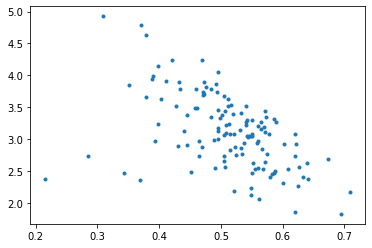

In [11]:
print(m1._fields)
import pylab as pl
pl.plot(m1.TM, m1.aRMS,".")

In [12]:
import numpy as np
def gridplot(m1,names=None):
    if names is None: names=get_field_names(m1)
    print (names)    
    pl.figure(figsize=(20,20))
    n=len(m1)
#     cv = np.cov(m1)
#     tt=np.matmul(np.diag(cv).reshape(-1,1)
#           ,np.diag(cv).reshape(-1,1).T)
#     cv /= np.sqrt(tt)
    cv,tt=cvtt(m1)
    u,w,v= np.linalg.svd(cv)
    
    for i in range(n):
        for j in range(n):
            ij=i*n+j+1
            pl.subplot(n,n,ij)
            if i!=j:
                pl.plot(m1[i],m1[j],".")
                pl.xlabel(names[i])
                pl.title("covariance / variance) {:5.4f}".format( cv[i,j]))
            else:
                
                pl.plot(np.sort(m1[i]))
                pl.xlabel("index")
                pl.title(" std deviation {:5.4f}".format( tt[i,i]))
            pl.ylabel(names[j])
    pl.tight_layout()
    return m1,cv,tt,names

def get_field_names(m1):
    '''expects a named tuple but if it doesnt get one it gracefully returns some numbered filed names'''
    try:
            names = m1._fields
    except:
        names = ['F_{}'.format(i) for i in range(len(m1))]
    return names

def cvtt(m1):
    '''compute ormalized covariances for m1'''
    cv = np.cov(m1)
    tt=np.matmul(np.diag(cv).reshape(-1,1)
          ,np.diag(cv).reshape(-1,1).T)
    cv /= np.sqrt(tt) 
    return cv,tt

def replot(m1,names=None):
    '''Extracts the two most ocvariant mements for each row, and plots them against each other colored by the value ot the third in all permuatation'''
    cv,tt=cvtt(m1)   
    if names is None: names=get_field_names(m1)
    ii = np.argsort(-np.abs(cv))[:,0:3]
    for i in ii:
        fig=pl.figure(figsize=(10,3))
        for j in range(3):
            ax=pl.subplot(1,3,j+1)
            mn = np.min(m1[i[(j+2)%3]])
            mx = np.max(m1[i[(j+2)%3]])-mn
            
            pl.scatter(m1[i[j]],m1[i[(j+1)%3]],c=(m1[i[(j+2)%3]]-mn)/mx    )
            pl.ylabel(names[i[(j+1)%3]])
            pl.xlabel(names[i[(j)%3]])
            pl.title("colored by {}".format(names[i[(j+2)%3]]))
           # ax.set_aspect('equal')
        pl.tight_layout()
#         pl.subplot(3,1,2)
#         pl.plot(m1[i[1]],m1[i[2]],c=m1[i[0]])
#         pl.subplot(3,1,3)
#         pl.plot(m1[i[0]],m1[i[1]],c=m1[i[1]])
    

('TM', 'PSI', 'aPSI', 'oPSI', 'rPSI', 'cRMS', 'aRMS', 'oRMS', 'aSeq_ident', 'oSeq_ident', 'cSeq_Ident', 'L_min', 'L_aligned', 'L_orientable', 'L_PSI')


<ipython-input-12-5545195ad373>:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


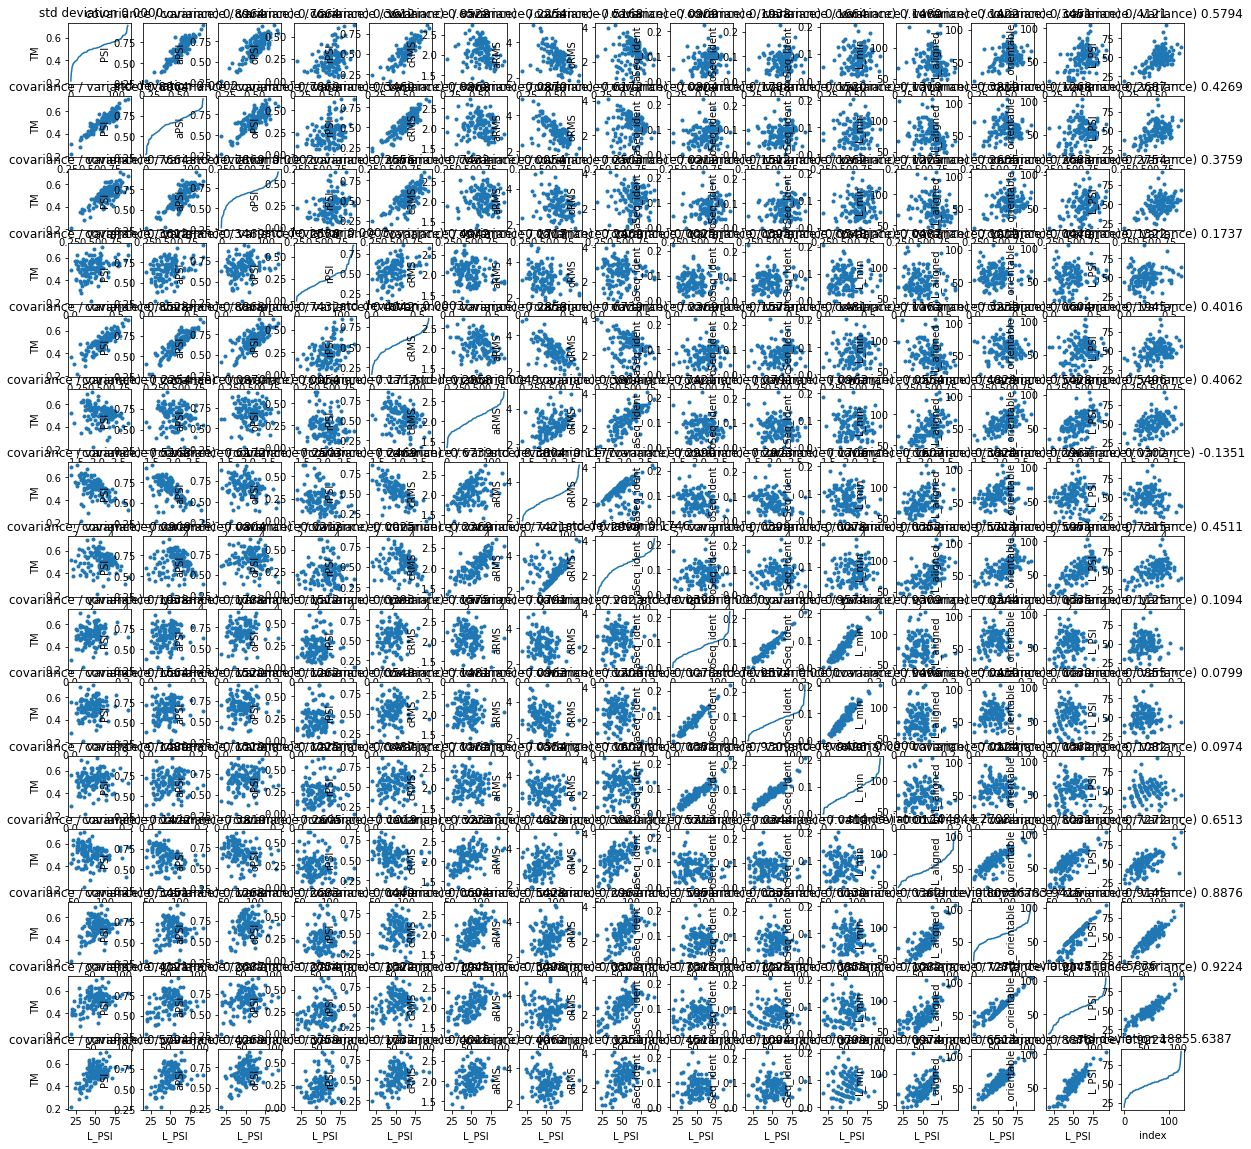

In [13]:
_,cv,tt,names=gridplot(m1)  


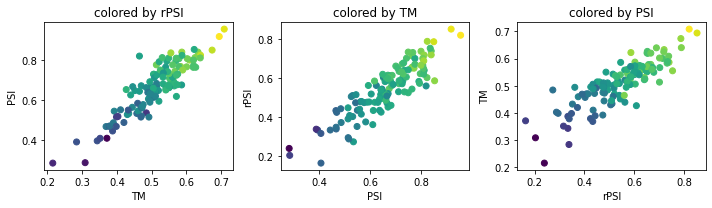

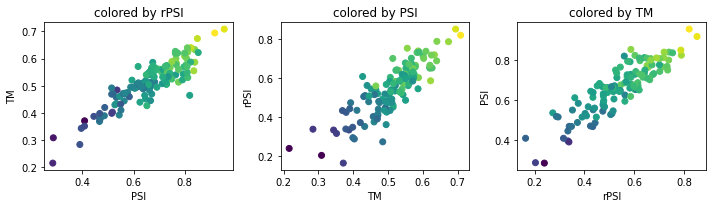

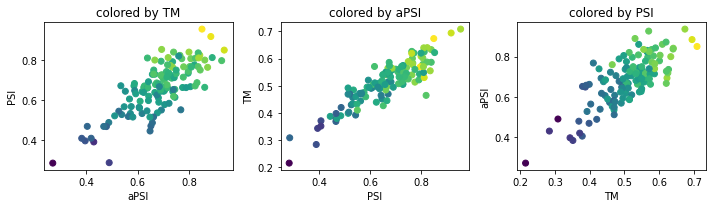

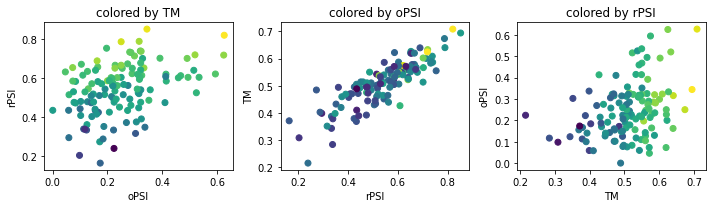

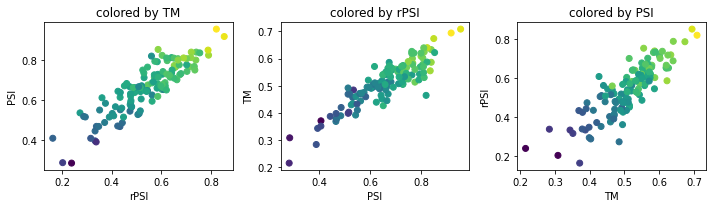

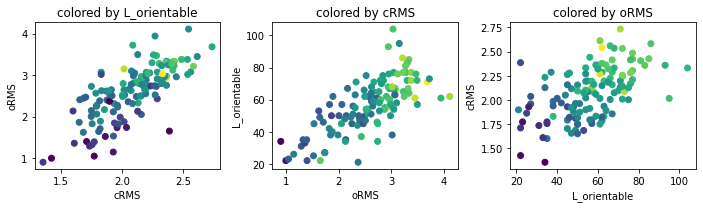

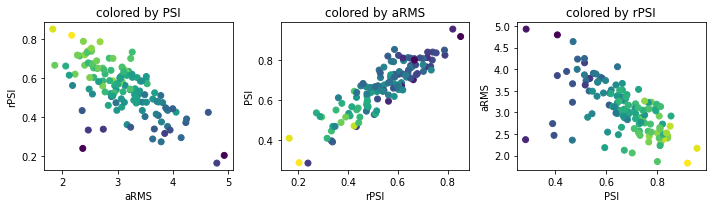

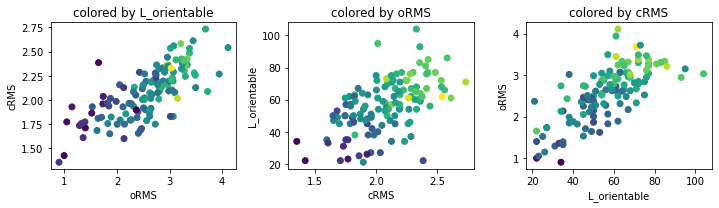

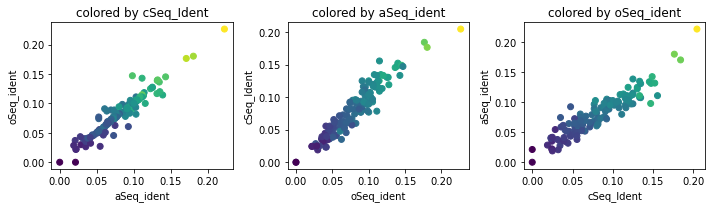

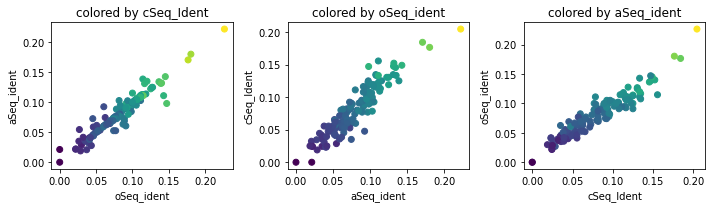

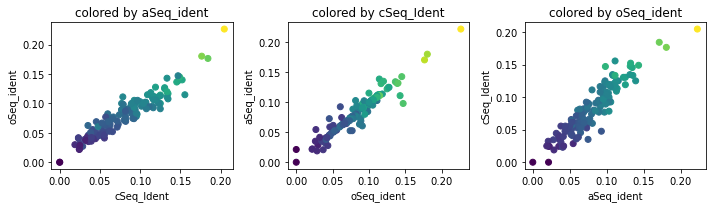

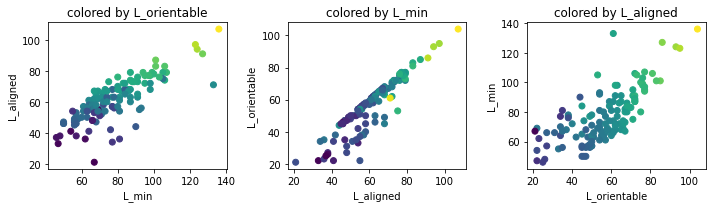

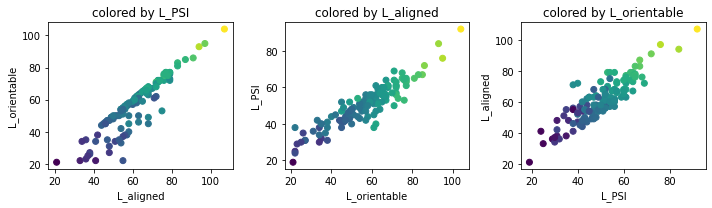

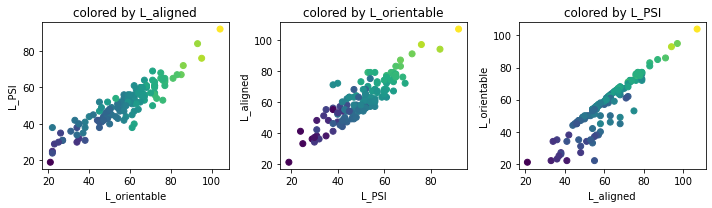

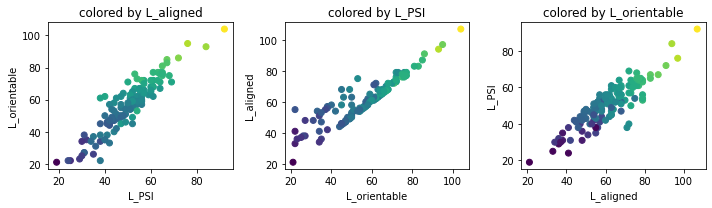

In [14]:

replot(m1)

In [15]:
m10 = np.array(m1)
[ m1._fields[i] for i in (0,4,7,9)]
replot([ m1[i] for i in (0,4,7,9)],[ m1._fields[i] for i in (0,4,7,9)] )
_=gridplot([ m1[i] for i in (0,4,7,9)],[ m1._fields[i] for i in (0,4,7,9)] )

['TM', 'rPSI', 'oRMS', 'oSeq_ident']


['F_0', 'F_1', 'F_2']


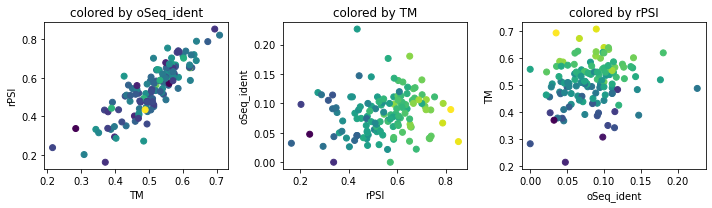

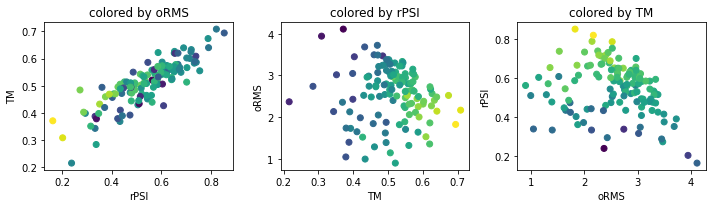

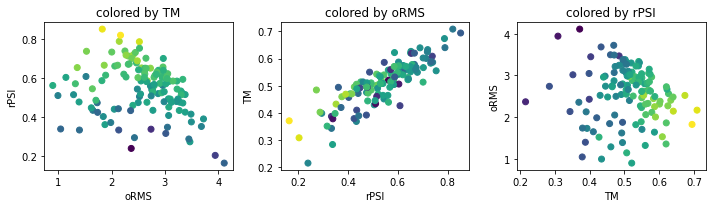

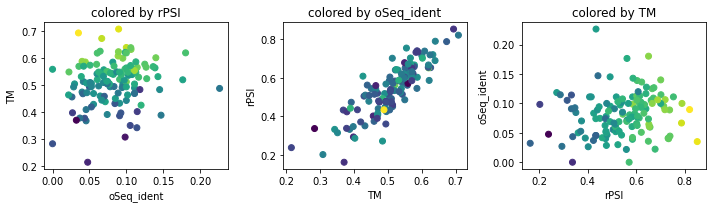

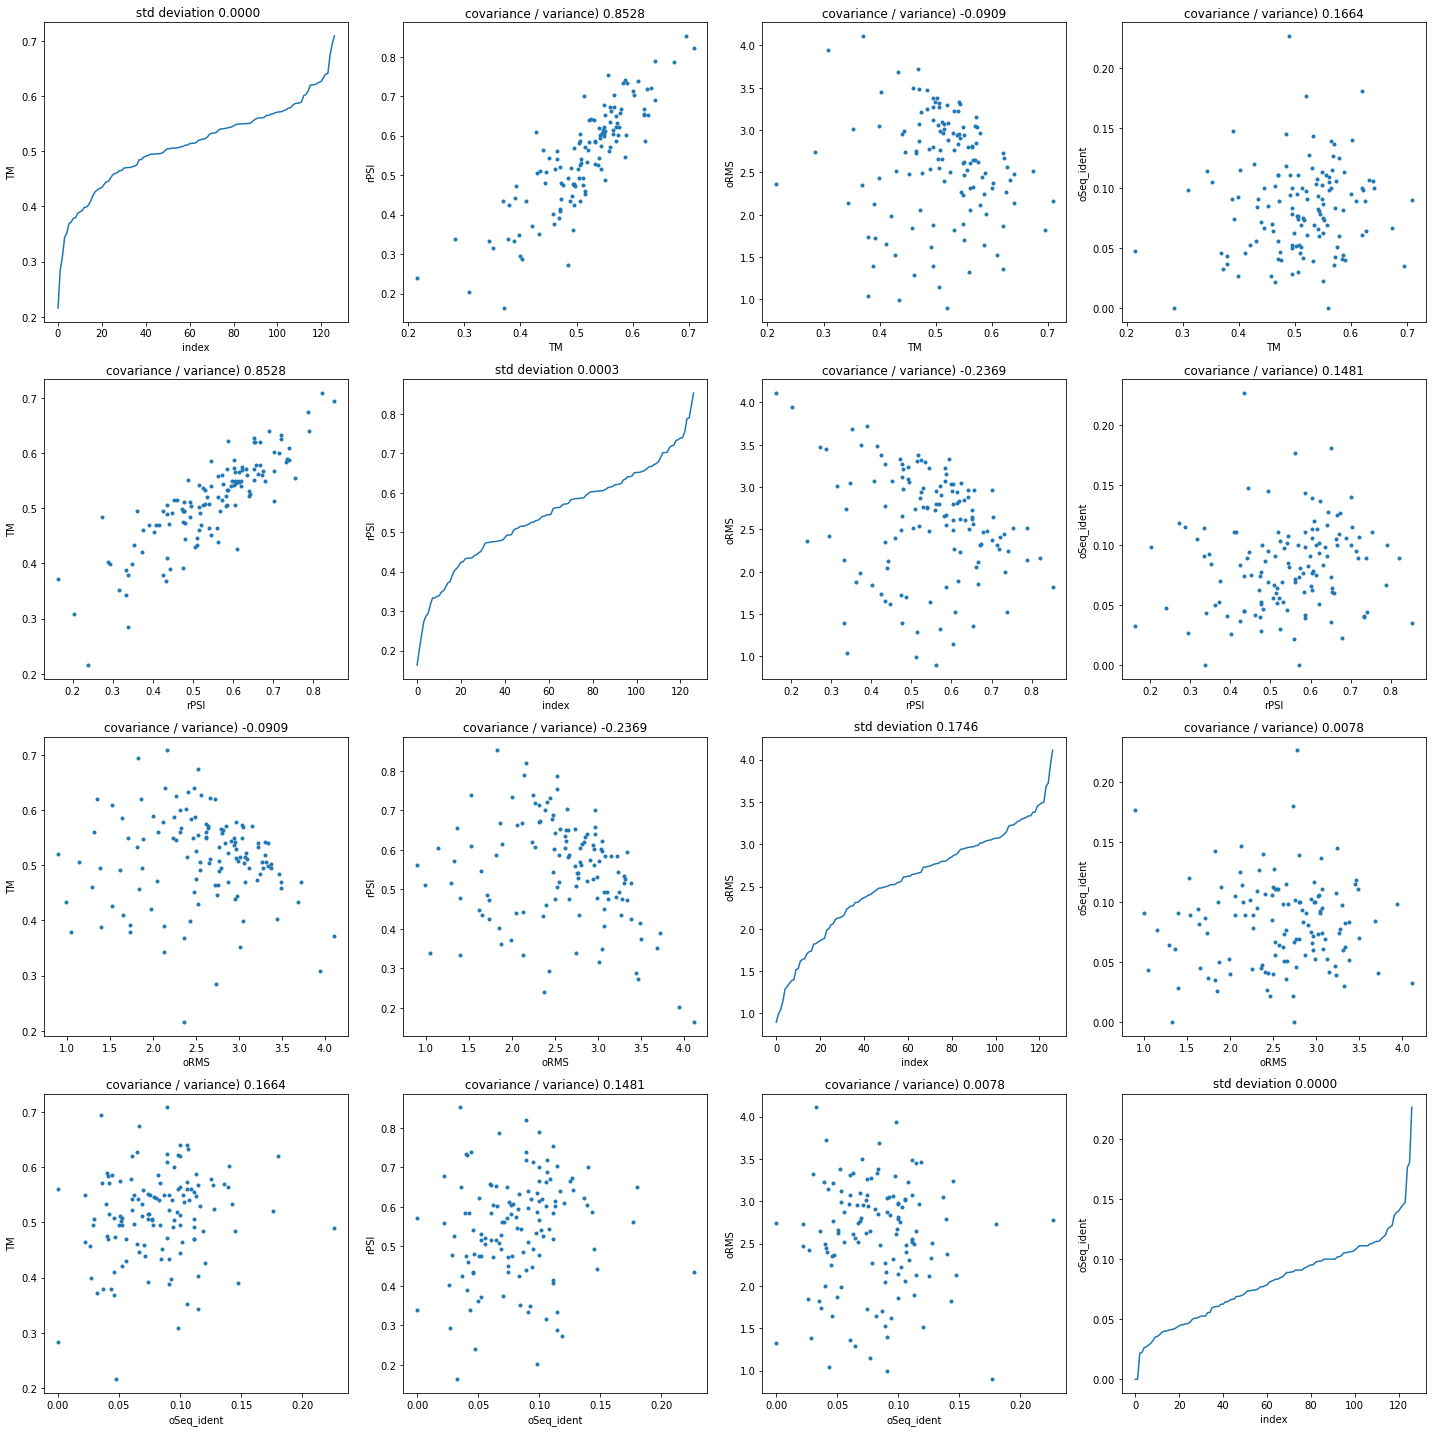

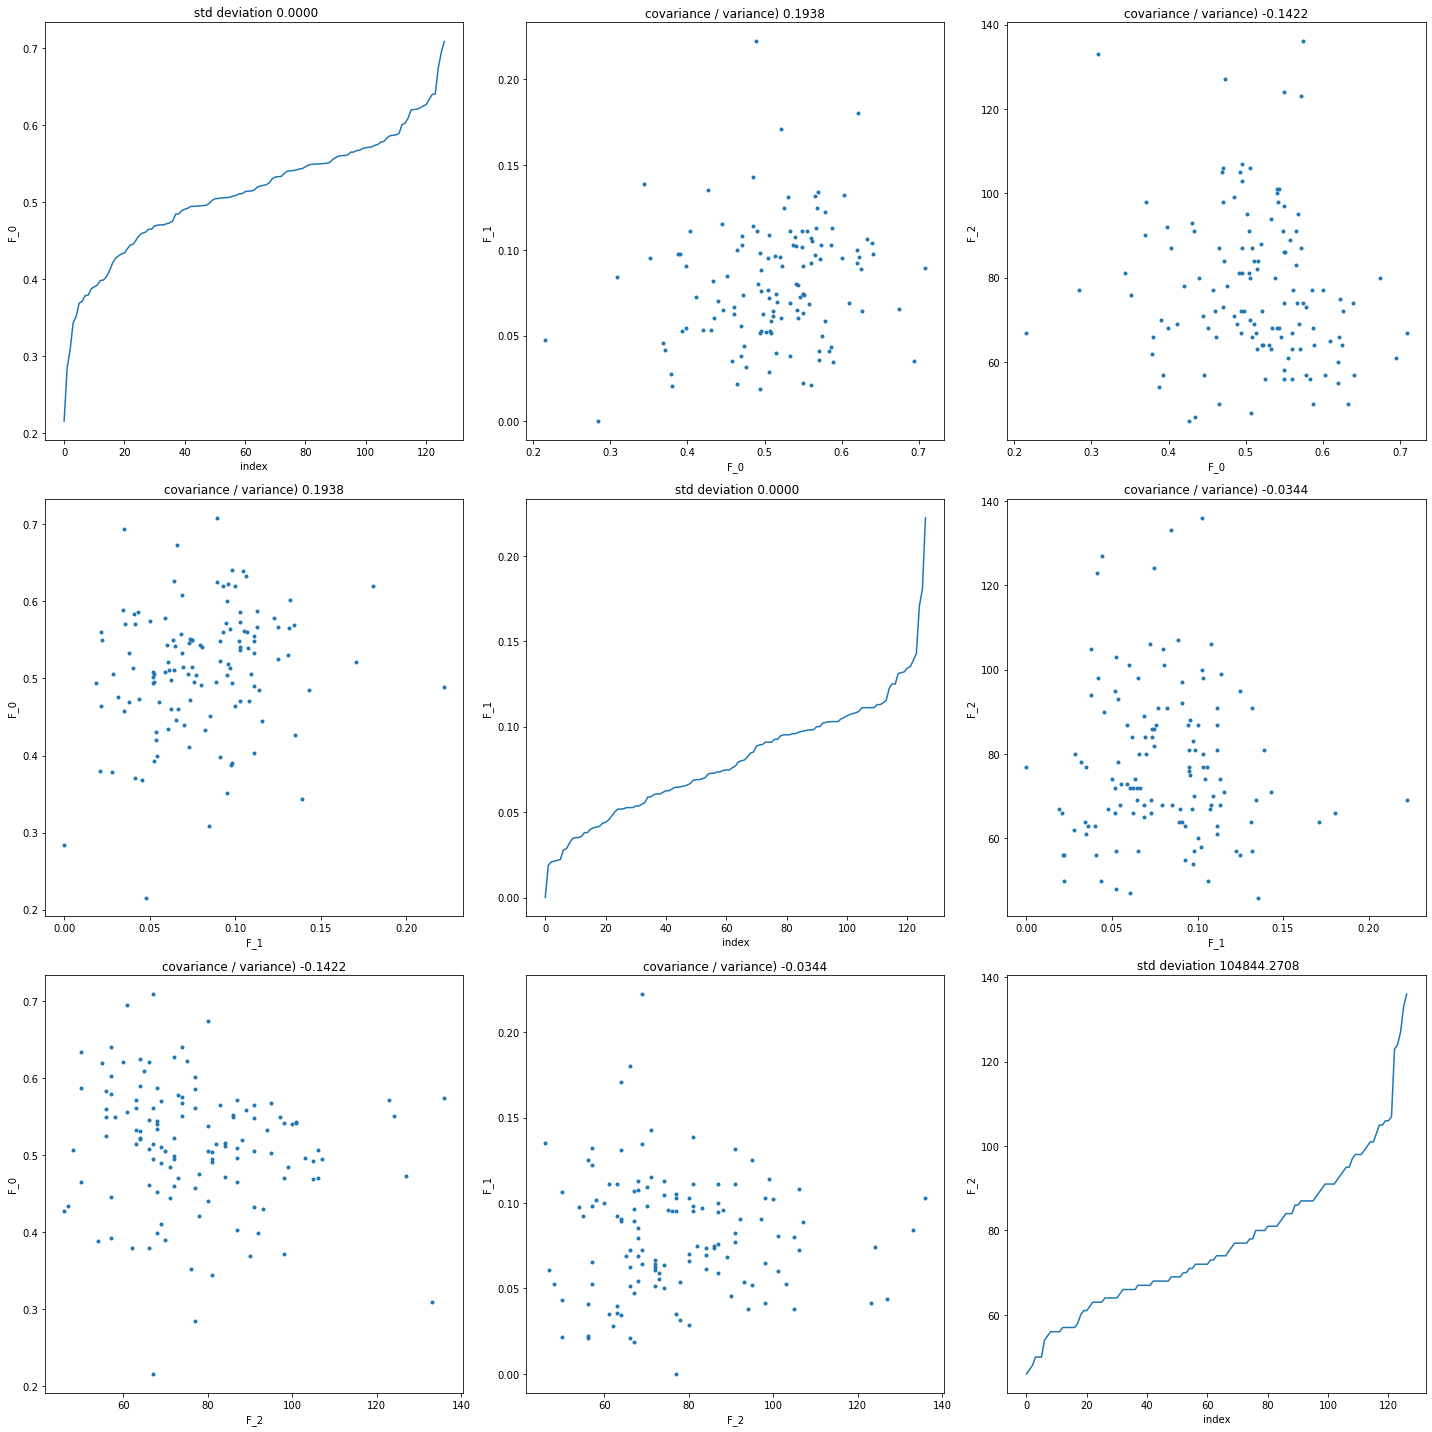

In [16]:
_=gridplot(( m1.TM,m1.aSeq_ident,m1.L_min))

In [17]:
aa = np.array(m1)
print (np.shape(aa))
temp = np.mean(aa,axis=1).reshape(-1,1)
print(temp)
aa-= temp
np.shape(aa)

(15, 127)
[[ 0.51181589]
 [ 0.66213324]
 [ 0.68455129]
 [ 0.24605309]
 [ 0.54409261]
 [ 2.07797433]
 [ 3.11246751]
 [ 2.57271   ]
 [ 0.0803481 ]
 [ 0.08163233]
 [ 0.08256586]
 [77.22834646]
 [61.04724409]
 [56.48818898]
 [50.28346457]]


(15, 127)

In [18]:
tt=np.matmul(np.diag((np.cov(aa))).reshape(-1,1)
          ,np.diag((np.cov(aa))).reshape(-1,1).T)
np.shape(tt)


(15, 15)

In [19]:
cv =np.cov(aa)/np.sqrt(tt)
np.argsort(-np.abs(cv))


array([[ 0,  1,  4,  2, 14,  6, 13,  3, 12,  5,  8,  9, 10, 11,  7],
       [ 1,  0,  4,  2,  6, 14, 11,  3, 13,  8,  9, 10, 12,  5,  7],
       [ 2,  1,  0,  4, 14, 13, 12, 11,  3,  6,  8,  9, 10,  7,  5],
       [ 3,  4,  0,  1,  2,  6, 14,  5, 13, 11,  9, 10, 12,  8,  7],
       [ 4,  1,  0,  2,  6,  3, 14, 11,  5,  7, 13,  8,  9, 10, 12],
       [ 5,  7, 13, 12, 11, 14,  6,  4,  0,  3,  9,  1,  8, 10,  2],
       [ 6,  4,  1,  0, 11,  5,  7, 12,  2,  3,  8,  9, 10, 14, 13],
       [ 7,  5, 13, 12, 11, 14,  6,  4,  0,  1,  8, 10,  2,  9,  3],
       [ 8,  9, 10,  6,  0,  1,  4,  2, 13, 14,  5,  7,  3, 11, 12],
       [ 9,  8, 10,  6,  0,  1,  4,  2,  5, 13, 14,  3, 11, 12,  7],
       [10,  9,  8,  6,  0,  1,  2,  4, 13, 14,  5,  3, 12,  7, 11],
       [11, 12, 13, 14,  7,  5,  6,  1,  4,  2,  0,  3,  9,  8, 10],
       [12, 13, 14, 11,  7,  5,  0,  6,  2,  1,  4,  3, 10,  8,  9],
       [13, 14, 12,  7, 11,  5,  0,  2,  1,  4,  3,  8, 10,  9,  6],
       [14, 13, 12, 11,  0,  7,  1

In [20]:
cv[0]

array([ 1.        ,  0.89639696,  0.76642936,  0.36124173,  0.8527538 ,
       -0.22543015, -0.51684869, -0.09089063,  0.19384936,  0.16640939,
        0.14798213, -0.14218103,  0.34514003,  0.41209963,  0.5793715 ])

In [21]:
%ls *.pkl


dali_dup.pkl       fast_dup.pkl     manual_dup.pkl            tm_dup.pkl
dali_sam.pkl       fast_sam.pkl     manual_sam.pkl            tm_sam.pkl
deepblast_dup.pkl  mammoth_dup.pkl  needleman-wunsch_dup.pkl
deepblast_sam.pkl  mammoth_sam.pkl  needleman-wunsch_sam.pkl


In [22]:
import pickle
from collections import OrderedDict
gh ={}
ph={}
for i in 'dali fast manual deepblast mammoth needleman-wunsch tm'.split():               
    with open(i+'_'+tag+'.pkl','rb') as infile:
        gh[i]= pickle.load(infile)
        ph[i] = pivot(gh[i])
        print('{} size {}'.format(i,len(gh[i])))
        
        

dali size 127
fast size 127
manual size 127
deepblast size 127
mammoth size 126
needleman-wunsch size 127
tm size 127


In [23]:
#verify these are all the same names and in the same order.  toss out anyophans
print(gh['mammoth'][0]._fields)
reference = set(ph['mammoth'].name) #type(ph['mammoth'])(*ph['mammoth'])
u = [ set(i.name) for i in ph.values()]
foo = set((u[0]))
foo.intersection_update(*u)
print (len(foo),len(reference))
gk ={}
for k,v in gh.items():
    temp=[]
    for n in foo:
        ii = ph[k].name.index(n)
 
        temp.append(v[ii])
    gk[k]=pivot(temp)

gk['dali'].name == gk['mammoth'].name



('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')
126 126


True

In [24]:
type(gk['dali'])

__main__.Process

In [25]:
g1 = gk['deepblast']# convert h to column oriented
print(g1._fields)
mg1 = pivot(g1.tm_metric) # hierarchically pick a specific feature column and convert it's content to column oriented
print()
print(mg1._fields)

('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')

('TM', 'PSI', 'aPSI', 'oPSI', 'rPSI', 'cRMS', 'aRMS', 'oRMS', 'aSeq_ident', 'oSeq_ident', 'cSeq_Ident', 'L_min', 'L_aligned', 'L_orientable', 'L_PSI')


In [26]:
g2 = gk['needleman-wunsch'] # convert h to column oriented
print(g2._fields)
mg2 = pivot(g2.tm_metric) # hierarchically pick a specific feature column and convert it's content to column oriented
print()
print(mg2._fields)

('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')

('TM', 'PSI', 'aPSI', 'oPSI', 'rPSI', 'cRMS', 'aRMS', 'oRMS', 'aSeq_ident', 'oSeq_ident', 'cSeq_Ident', 'L_min', 'L_aligned', 'L_orientable', 'L_PSI')


Text(0, 0.5, 'deepblast')

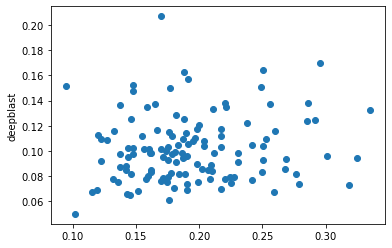

In [27]:
pl.scatter(mg1.TM,np.array(mg2.TM))
pl.ylabel('deepblast')

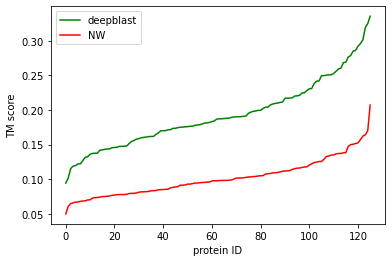

In [28]:
pl.plot(np.sort(mg1.TM),"g",label='deepblast')
pl.plot(np.sort(mg2.TM),"r",label='NW')
pl.ylabel('TM score')
pl.xlabel('protein ID')
pl.legend()

0 TM
1 PSI
2 aPSI
3 oPSI
4 rPSI
5 cRMS
6 aRMS
7 oRMS
8 aSeq_ident
9 oSeq_ident
10 cSeq_Ident
11 L_min
12 L_aligned
13 L_orientable
14 L_PSI


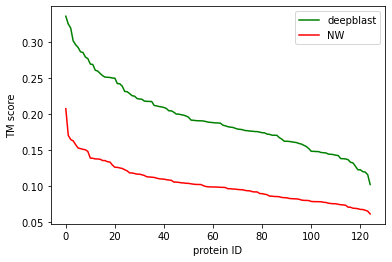

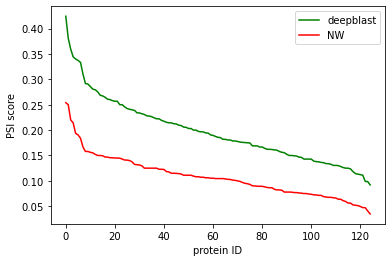

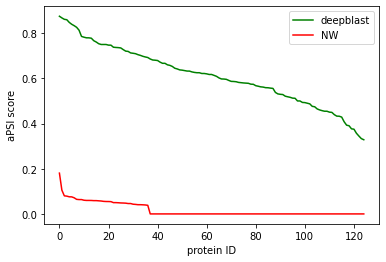

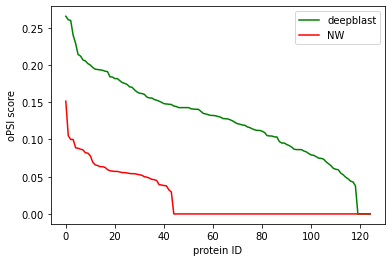

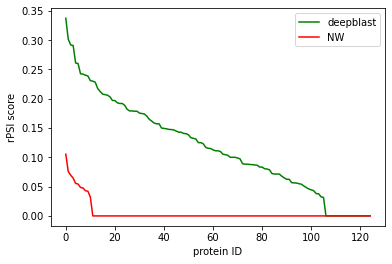

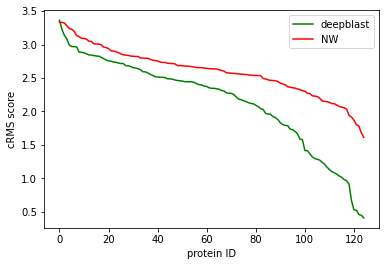

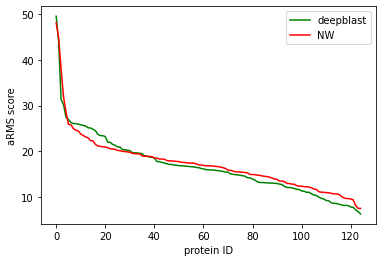

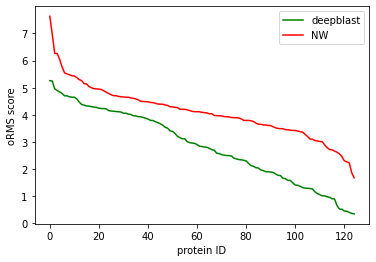

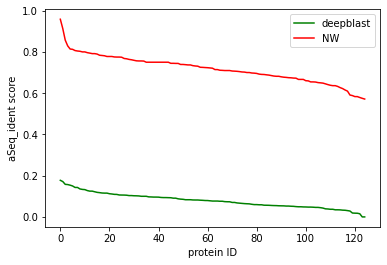

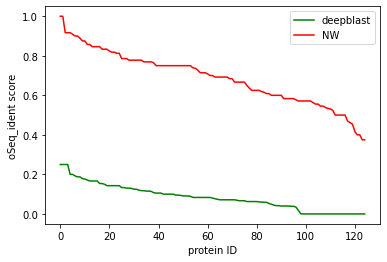

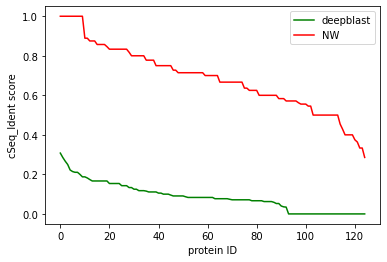

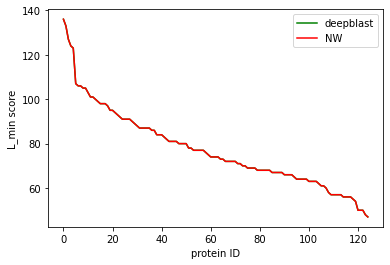

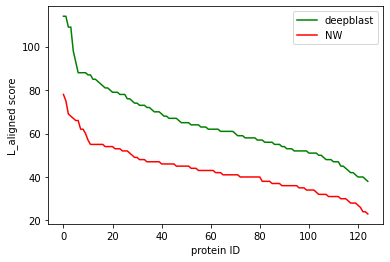

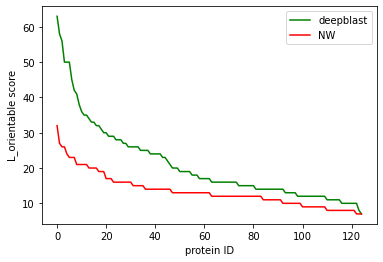

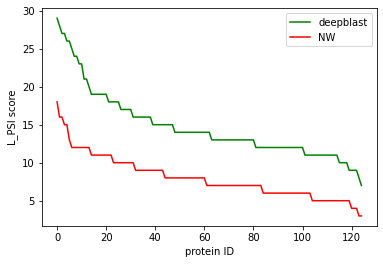

In [29]:
for i,j in enumerate(mg1._fields):
    print(i,j)
    pl.figure()
    pl.plot(np.sort(mg1[i])[-1:0:-1],"g",label='deepblast')
    pl.plot(np.sort(mg2[i])[-1:0:-1],"r",label='NW')
    pl.ylabel('{} score'.format(j))
    pl.xlabel('protein ID')
    pl.legend()

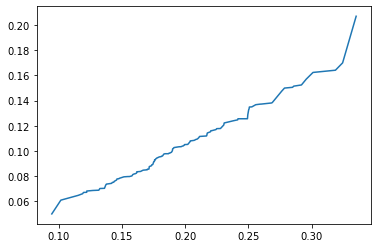

In [30]:
pl.plot(np.sort(mg1.TM),np.sort(mg2.TM))

0 TM
1 PSI
2 aPSI
3 oPSI
4 rPSI
5 cRMS
6 aRMS
7 oRMS
8 aSeq_ident
9 oSeq_ident
10 cSeq_Ident
11 L_min
12 L_aligned
13 L_orientable
14 L_PSI


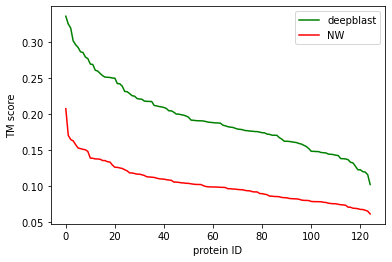

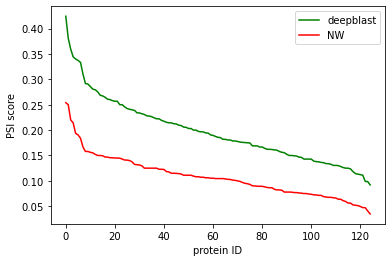

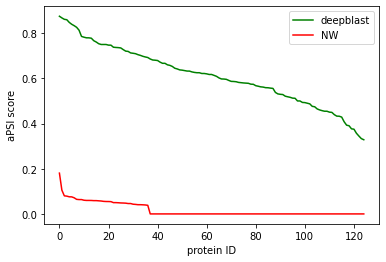

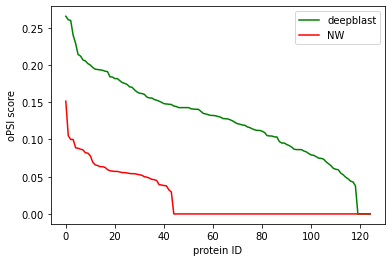

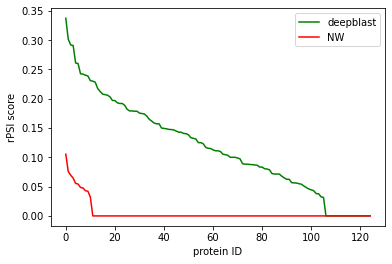

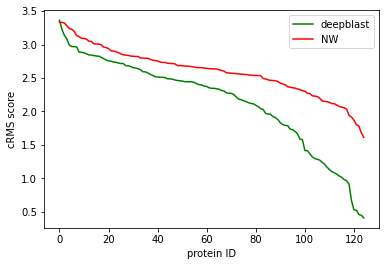

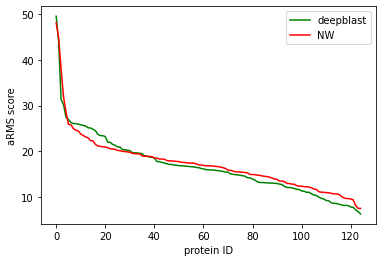

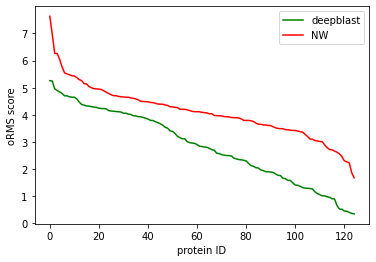

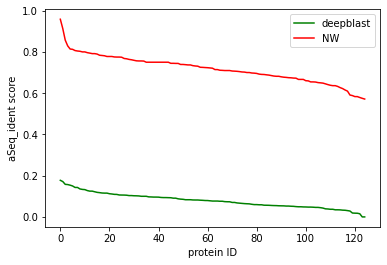

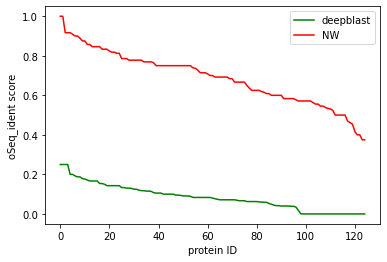

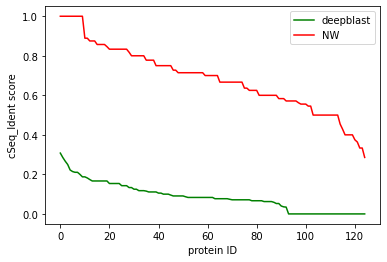

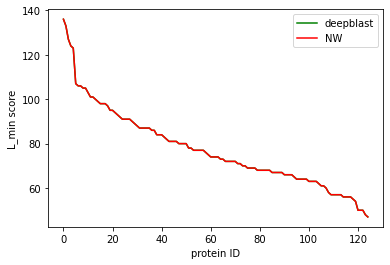

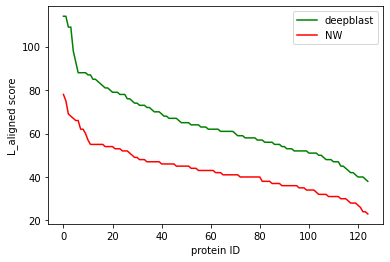

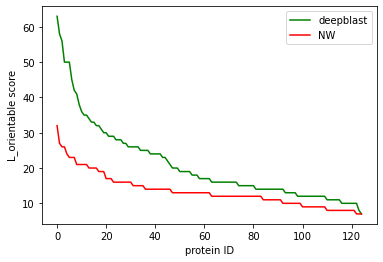

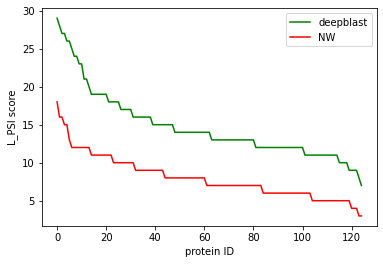

In [31]:
for i,j in enumerate(mg1._fields):
    print(i,j)
    pl.figure()
    a1=np.array(mg1[i])
    a2=np.array(mg2[i])
    i1 = np.argsort(a1)[-1:0:-1]
    i2 = np.argsort(a2)[-1:0:-1]
    pl.plot(a1[i1],"g",label='deepblast')
    pl.plot(a2[i2],"r",label='NW')
    pl.ylabel('{} score'.format(j))
    pl.xlabel('protein ID')
    pl.legend()

In [32]:
tmg={}
for i in 'dali fast manual deepblast mammoth needleman-wunsch tm'.split(): 
    print(gk[i]._fields)
    uu = pivot(gk[i].tm_metric) 
    tmg[i] = Metrics(*[ np.array(uu[kk]) for kk in range(len(uu._fields)) ])
type(tmg['dali'].TM )

('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')
('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')
('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')
('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')
('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')
('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')
('name', 'tm_alignment', 'maxsub_alignment', 'tm_metric', 'maxsub_metric', 'strong_metric', 'weak_metric')


numpy.ndarray

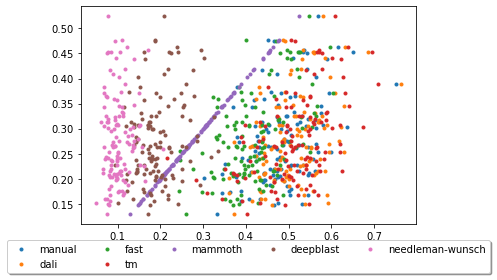

In [33]:
ref = np.argsort(-tmg['mammoth'].TM)
NW = 'needleman-wunsch'
#sn = [ tmg[i].TM[ref] for i in 'dali fast manual deepblast mammoth needleman-wunsch tm'.split()]
for i in 'manual dali fast  tm  mammoth deepblast needleman-wunsch'.split():
    pl.scatter(tmg[i].TM[ref],tmg['mammoth'].TM[ref],marker=".",label=i)
pl.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

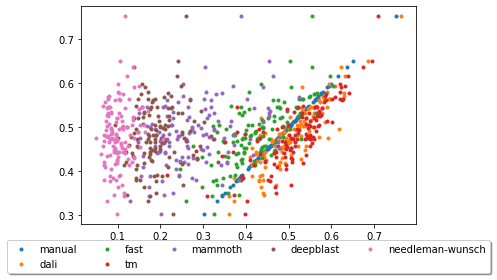

In [34]:
ref = np.argsort(-tmg['manual'].TM)
NW = 'needleman-wunsch'
#sn = [ tmg[i].TM[ref] for i in 'dali fast manual deepblast mammoth needleman-wunsch tm'.split()]
for i in 'manual dali fast  tm  mammoth deepblast needleman-wunsch'.split():
    pl.scatter(tmg[i].TM[ref],tmg['manual'].TM[ref],marker=".",label=i)
pl.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

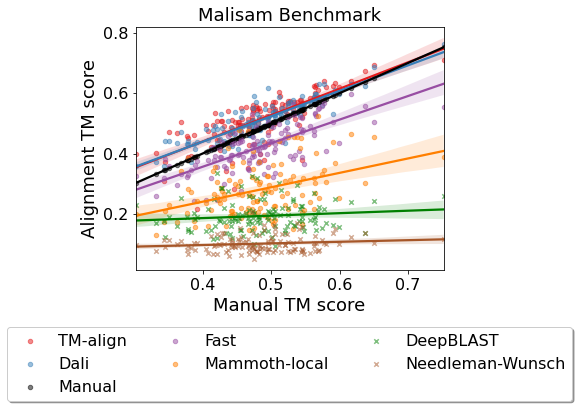

In [48]:
import seaborn as sns
import pandas as pd

fig, ax = pl.subplots(figsize=(7, 6))
ref_tool = 'manual'
ref = np.argsort(-tmg[ref_tool].TM)
NW = 'needleman-wunsch'
palette = sns.color_palette("Set1", 7)
palette[-2] = 'g'
palette[2] = 'k'
order = ['Needleman-Wunsch', 'DeepBLAST', 'Mammoth-local', 'Fast', 'Manual', 'Dali', 'TM-align'][::-1]
'manual dali fast  tm  mammoth deepblast needleman-wunsch'
for i, name in enumerate('tm dali manual fast  mammoth deepblast needleman-wunsch'.split()):
    if name in ['needleman-wunsch', 'deepblast']:
        marker = 'x'
    else:
        marker='o'
    dat = pd.DataFrame({name: tmg[name].TM[ref], 'ref': tmg[ref_tool].TM[ref]})
    sns.regplot(data=dat, y=name, x='ref', color=palette[i], label=order[i],
                marker=marker,
                scatter_kws={"s": 20, "alpha": 0.5}, ax=ax)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 18})

pl.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=3, prop={'size': 16})

#ax.set_ylim([0.3, 0.8])
ax.set_ylabel('Alignment TM score', fontsize=18)
ax.set_xlabel('Manual TM score', fontsize=18)
ax.set_title(f'Mali{tag} Benchmark', fontsize=18)
ax.tick_params(labelsize=16)
pl.tight_layout()
pl.savefig(f'{tag}_tm_scores.png')

(0.0, 0.1774193548387097)

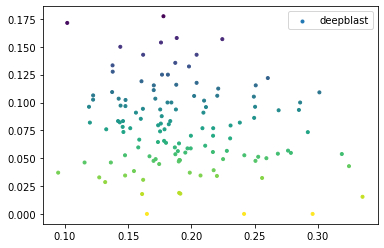

In [49]:
#pl.scatter(tmg[NW].TM,(tmg[i].aSeq_ident))
i = 'deepblast'
mn = np.min(tmg[i].aSeq_ident)
mx = np.max(tmg[i].aSeq_ident)-mn
            
#pl.scatter(m1[i[j]],m1[i[(j+1)%3]],c=(m1[i[(j+2)%3]]-mn)/mx   
pl.scatter(tmg[i].TM,tmg[i].aSeq_ident,c=0.5-(tmg[i].aSeq_ident-mn)/mx,marker='.',label=i)
pl.legend()
mn,mx

(0.5652173913043478, 0.3931159420289856)

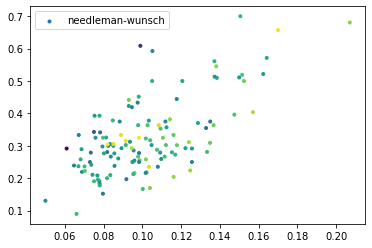

In [50]:
i = NW
mn = np.min(tmg[i].aSeq_ident)
mx = np.max(tmg[i].aSeq_ident)-mn
            
#pl.scatter(m1[i[j]],m1[i[(j+1)%3]],c=(m1[i[(j+2)%3]]-mn)/mx   
pl.scatter(tmg[i].TM,tmg[i].L_orientable/tmg[i].L_aligned,c=0.5-(tmg[i].aSeq_ident-mn)/mx,marker='.',label=i)
pl.legend()
mn,mx


(0.0, 0.1774193548387097)

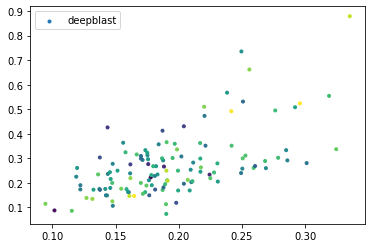

In [51]:
i = 'deepblast'
mn = np.min(tmg[i].aSeq_ident)
mx = np.max(tmg[i].aSeq_ident)-mn
            
#pl.scatter(m1[i[j]],m1[i[(j+1)%3]],c=(m1[i[(j+2)%3]]-mn)/mx   
pl.scatter(tmg[i].TM,tmg[i].L_orientable/tmg[i].L_min,c=0.5-(tmg[i].aSeq_ident-mn)/mx,marker='.',label=i)
pl.legend()
mn,mx


(0.09456190306064094, 0.2407362631333015)

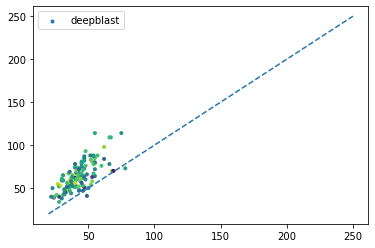

In [52]:
i = 'deepblast'
mn = np.min(tmg[i].TM)
mx = np.max(tmg[i].TM)-mn
            
#pl.scatter(m1[i[j]],m1[i[(j+1)%3]],c=(m1[i[(j+2)%3]]-mn)/mx   
pl.scatter(tmg[NW].L_aligned,tmg[i].L_aligned,c=1-(tmg[i].aSeq_ident-mn)/mx,marker='.',label=i)
pl.plot([20,250],[20,250],'--')
pl.legend()
mn,mx


(0.09456190306064094, 0.2407362631333015)

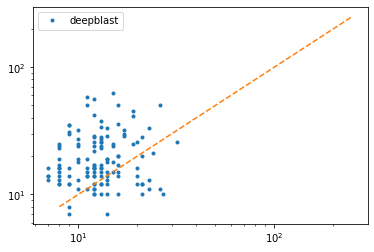

In [53]:
i = 'deepblast'
mn = np.min(tmg[i].TM)
mx = np.max(tmg[i].TM)-mn
            
#pl.scatter(m1[i[j]],m1[i[(j+1)%3]],c=(m1[i[(j+2)%3]]-mn)/mx   
pl.loglog(tmg[NW].L_orientable,tmg[i].L_orientable,'.',label=i)
pl.plot([8,250],[8,250],'--')
pl.legend()
mn,mx

0 TM
1 PSI
2 aPSI
3 oPSI
4 rPSI
5 cRMS
6 aRMS
7 oRMS
8 aSeq_ident
9 oSeq_ident
10 cSeq_Ident
11 L_min
12 L_aligned
13 L_orientable
14 L_PSI


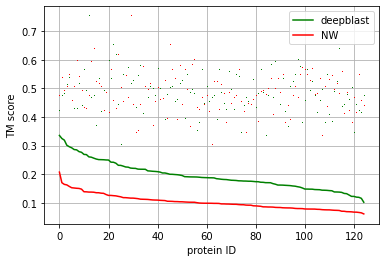

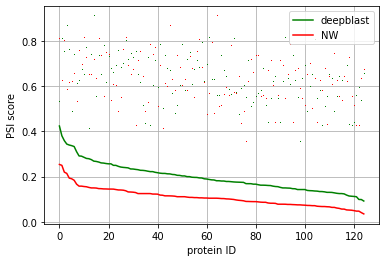

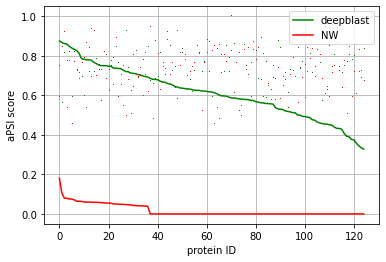

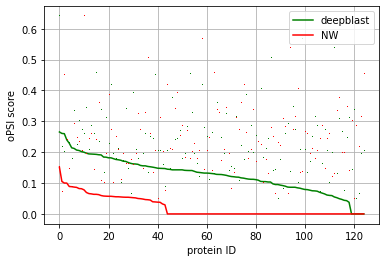

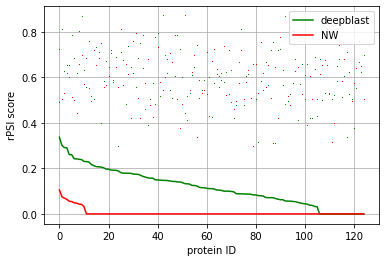

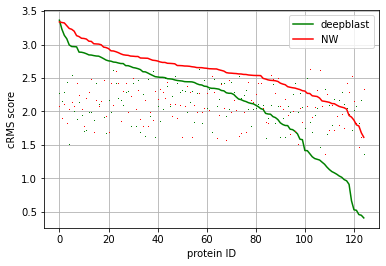

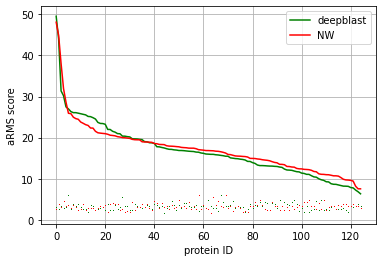

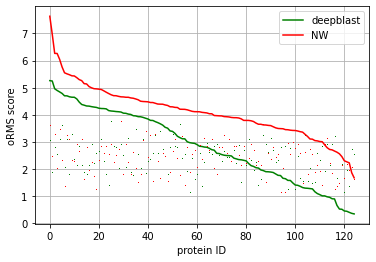

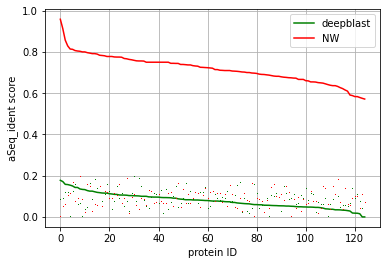

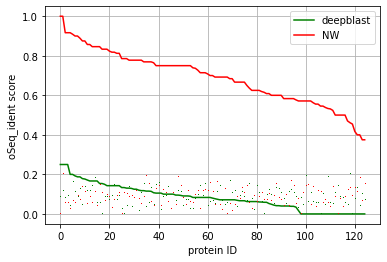

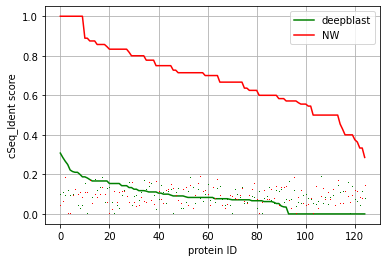

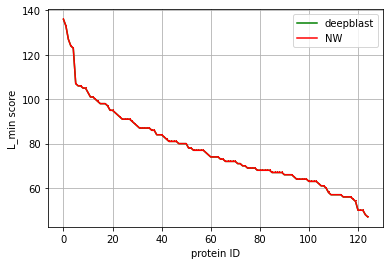

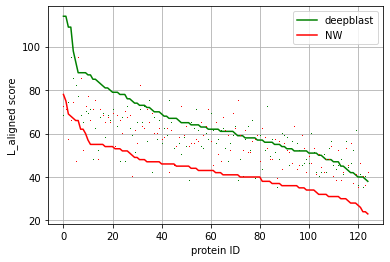

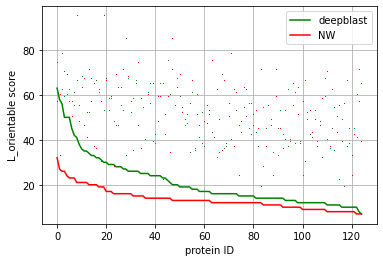

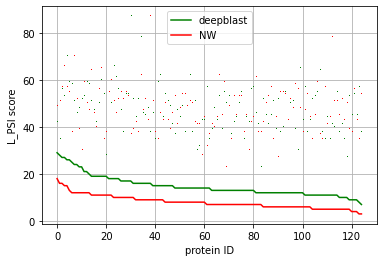

In [54]:
for i,j in enumerate(mg1._fields):
    print(i,j)
    pl.figure()
    a1=np.array(tmg['deepblast'][i])
    a2=np.array(tmg[NW][i])
    i1 = np.argsort(a1)[-1:0:-1]
    i2 = np.argsort(a2)[-1:0:-1]
  #  print(i1.shape,a1.shape,(tmg['manual'][i].shape))
    pl.plot(a1[i1],"g",label='deepblast')
    pl.plot(tmg['manual'][i][i1],'g,')
    pl.plot(a2[i2],"r",label='NW')
    pl.plot(tmg['manual'][i][i2],'r,')

    pl.ylabel('{} score'.format(j))
    pl.xlabel('protein ID')
    pl.grid(True)
    pl.legend()

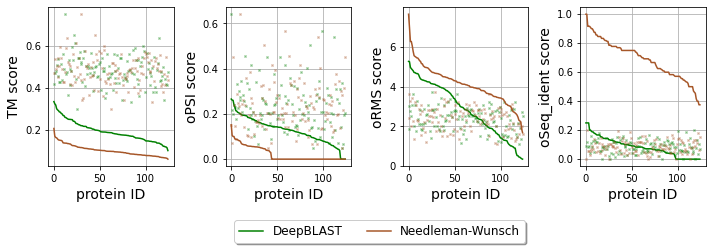

In [56]:
lookup = dict(list(zip(mg1._fields, list(range(len(mg1._fields))))))
fields = [(lookup[x], x) for x in ['TM', 'oPSI', 'oRMS', 'oSeq_ident']]
fig, ax = pl.subplots(1, 4, figsize=(10, 3))

for k, (i, j) in enumerate(fields):
    a1 = np.array(tmg['deepblast'][i])
    a2 = np.array(tmg[NW][i])
    i1 = np.argsort(a1)[-1:0:-1]
    i2 = np.argsort(a2)[-1:0:-1]
    ax[k].plot(a1[i1],c=palette[-2],label='DeepBLAST')
    ax[k].plot(tmg['manual'][i][i1],c=palette[-2], marker='x', linestyle = 'None', ms=2, alpha=0.5)
    ax[k].plot(a2[i2],c=palette[-1],label='Needleman-Wunsch')
    ax[k].plot(tmg['manual'][i][i2],c=palette[-1], marker='x', linestyle = 'None', ms=2, alpha=0.5)

    ax[k].set_ylabel('{} score'.format(j), fontsize=14)
    ax[k].set_xlabel('protein ID', fontsize=14)
    ax[k].grid(True)

pl.tight_layout()
pl.legend(loc='upper center', bbox_to_anchor=(-1.6, -0.3),
          fancybox=True, shadow=True, ncol=3, prop={'size': 12})
pl.show()
fig.savefig(f'{tag}_deepblast_nw.png')

In [ ]:

i='deepblast'
pl.plot(tmg[i].L_PSI/tmg[i].L_min)
pl.plot(tmg[i].L_PSI/tmg[i].L_orientable)